## 1. Importing Modules and Data ##

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, TextIO
from cchs import *
%matplotlib inline

CCHS = np.genfromtxt('CCHSX.csv', delimiter=',', skip_header=1, dtype=DATA_COLUMNS)
replace_nominal_codes(CCHS, 'biosex', (('1','M'),('2','F')))
replace_nominal_codes(CCHS, 'province', PROVINCE_CODES)
replace_nominal_codes(CCHS, 'hasdoctor', (('1','Y'),('2','N')))
replace_nominal_codes(CCHS, 'firstlanguage', (('1','EN'),('2','FR'),('3','EF'),('4','NO')))
replace_missing_with_nan(CCHS, 'alcoweek', (996,))
replace_missing_with_nan(CCHS, 'workhoursperweek', (996,))

## 2. Perceived Health Status by Age Group ##

We wished to determine if there was a correlation between age and perceived physical health. Using the age groups from the Canadian Community Health Survey (CCHS), we considered how individuals in different age groups rated their perceived physical health from 0 (poor) to 4 (excellent).

Text(0.5, 0, 'Age Group')

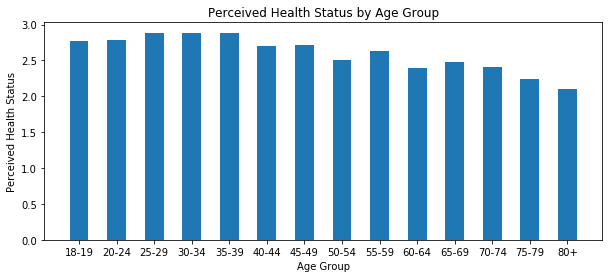

In [2]:
agebins = {
    3 : "18-19",
    4 : "20-24",
    5 : "25-29",
    6 : "30-34",
    7 : "35-39",
    8 : "40-44",
    9 : "45-49",
    10: "50-54",
    11: "55-59",
    12: "60-64",
    13: "65-69",
    14: "70-74",
    15: "75-79",
    16: "80+",
}
agecol = CCHS['agegroup']
average_healths = []

for agecode in agebins:
    mask = agecol == agecode
    avg = np.average(CCHS[mask]['healthphys'])
    average_healths.append(avg)


plt.figure(figsize=(10,4))
plt.bar(agebins.values(), average_healths, width=0.5)
plt.title('Perceived Health Status by Age Group')
plt.ylabel('Perceived Health Status')
plt.xlabel('Age Group')

According to this graph, it appears that as age increases, the perceived health status decreases. It seems that as individuals get older, they think that their physical health is deteriorating.

## 3. Daily Stress by Age Group ##

We also wished to determine if there was a correlation between age and perceived amount of daily stress. Using the age groups from the CCHS, we considered how individuals in different age groups rated their perceived daily stress from 1 (not stressful at all) to 5 (extremely stressful).

Text(0.5, 0, 'Age Group')

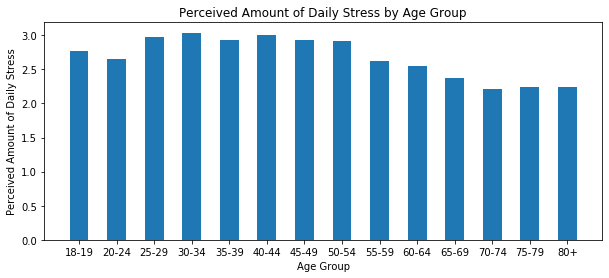

In [3]:
average_satisfactions = []

for agecode in agebins:
    mask = agecol == agecode
    avg = np.average(CCHS[mask]['stressgen'])
    average_satisfactions.append(avg)


plt.figure(figsize=(10,4))
plt.bar(agebins.values(), average_satisfactions, width=0.5)
plt.title('Perceived Amount of Daily Stress by Age Group')
plt.ylabel('Perceived Amount of Daily Stress')
plt.xlabel('Age Group')

Previously, we learned that as individuals get older, they perceive their physical health to be deteriorating. Based on this graph, it also appears that as age increases, the perceived amount of daily stress decreases.
